In [147]:
library('tidyverse','MASS')

# Homework 3

## Problem 1

Give three examples of Bernoulli rv's (other than those in the text). (Select all that apply.) 

X = 1 if a randomly selected driver has automoble insurance and X = 0 otherwise.

X = 1 if a randomly selected lightbulb needs to be replaced and X = 0 otherwise.

X = 1 if a randomly selected book is non-fiction and X = 0 otherwise.

## Problem 2

Two fair six-sided dice are tossed independently. Let M = the maximum of the two tosses (so M(1,5) = 5, M(3,3) = 3, etc.).

In [26]:
die <- c(1:6)
two_die <- expand.grid(die,die)
two_die$M <- apply(two_die,1,max)
freq_M <- as.data.frame(table(two_die$M))
freq_M$cumsum <- cumsum(freq_M$Freq)
freq_M$n <- dim(two_die)[1]
freq_M$pmf <- freq_M$Freq/freq_M$n
freq_M$cdf <- freq_M$cumsum/freq_M$n
freq_M

Var1,Freq,cumsum,n,pmf,cdf
1,1,1,36,0.02777778,0.02777778
2,3,4,36,0.08333333,0.11111111
3,5,9,36,0.13888889,0.25000000
4,7,16,36,0.19444444,0.44444444
5,9,25,36,0.25000000,0.69444444
6,11,36,36,0.30555556,1.00000000


(a) What is the pmf of M? [Hint: First determine p(1), then p(2), and so on.] (Enter your answers as fractions.)

In [35]:
cat('pmf') 
MASS::fractions(freq_M$pmf,max.denominator = 40)

pmf

[1]  1/36  1/12  5/36  7/36   1/4 11/36

(b) Determine the cdf of M. (Enter your answers as fractions.) F(m) = 

In [36]:
cat('cdf')
MASS::fractions(freq_M$cdf,max.denominator = 40)

cdf

[1]  1/36   1/9   1/4   4/9 25/36     1

Graph the cdf of M.
![image.png](attachment:image.png)

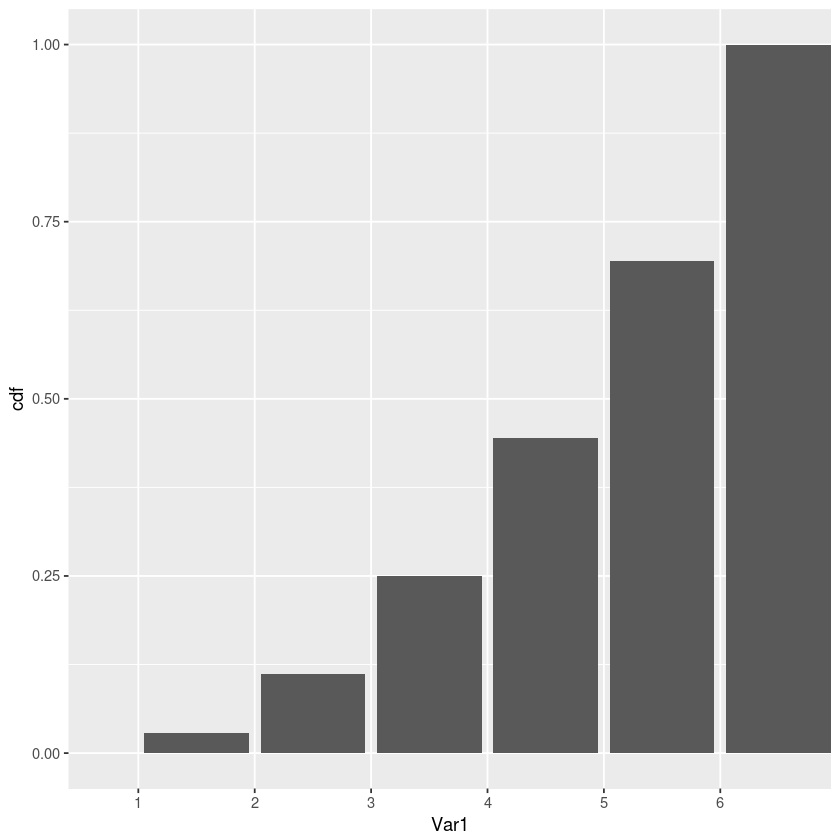

In [44]:
ggplot(freq_M,aes(x =Var1 ,y = cdf)) +
geom_col( position = position_nudge(x = 0.5)) 

## Problem 3
The pmf of the amount of memory X (GB) in a purchased flash drive is given as the following.

|x   |1   |2   |4   |8   |16  |
|----|----|----|----|----|----|
|p(x)|0.05|0.10|0.35|0.45|0.05|

In [88]:
x <-   c(1   ,2   ,4   ,8   ,16  )
p_x <- c(0.05,0.10,0.35,0.45,0.05)
x_p <- as.data.frame(cbind(x,p_x))
x_p$xp <- apply(x_p,1,prod)
x_p$dev  <- x_p$x-sum(xp)
x_p$dev_sq<- x_p$dev^2
x_p$dev_sq_p_x <- x_p$dev_sq*x_p$p_x
x_p$x_sq <- x^2


(a) Compute E(X). (Enter your answer to two decimal places.)

In [89]:
sum(xp)

[1] 6.05

(b) Compute V(X) directly from the definition. (Enter your answer to four decimal places.)

In [90]:
var_x <- sum(x_p$dev_sq_p_x)
var_x

[1] 11.0475

(c) Compute the standard deviation of X. (Round your answer to three decimal places.)

In [91]:
sd_x <- sqrt(var_x)
round(sd_x,3)

[1] 3.324

(d) Compute V(X) using the shortcut formula. (Enter your answer to four decimal places.)

$V(X)= \sigma ^2 = \left[ {\sum{x^2 \cdot p(x)}}  \right] - \mu ^2 = E(X^2)-[E(X)]^2$

In [103]:
expected_square <- sum(x^2*p_x) 
square_of_expected  <- sum(x*p_x)^2
ss_var_x <- expected_square - square_of_expected
ss_var_x

[1] 11.0475

## Problem 4
Compute the following binomial probabilities directly from the formula for b(x; n, p). (Round your answers to three decimal places.)

(a)    b(3; 8, 0.3)

In [108]:
round(dbinom(3,size = 8,prob = 0.3),3)

[1] 0.254

(b)    b(6; 8, 0.6)

In [110]:
round(dbinom(6,8,0.6),3)

[1] 0.209

(c)    P(3 ≤ X ≤ 5)
when n = 7 and p = 0.6

In [118]:
round(pbinom(5,7,0.6)-pbinom(3-1,7,0.6),3)

[1] 0.745

(d)    P(1 ≤ X)
when n = 9 and p = 0.1

P(1 ≤ X) = 1-P(X>0)

In [125]:
round(1-pbinom(0,9,0.1),3)

[1] 0.613

## Problem 5
NBC News reported on May 2, 2013, that 1 in 20 children in the United States have a food allergy of some sort. Consider selecting a random sample of 15 children and let X be the number in the sample who have a food allergy. Then X ~ Bin(15, 0.05). (Round your probabilities to three decimal places.)

In [140]:
n <- 15
p <- 0.05

(a) Determine both P(X ≤ 3) and P(X < 3).

P(X < 3) = P(X<=3) - P(X==3)

In [141]:
round(pbinom(3,n,p),3)
round(pbinom(3,n,p)-dbinom(3,n,p),3)

[1] 0.995

[1] 0.964

(b) Determine P(X ≥ 4) = 1 - P(X <= 3)

In [142]:
round(1-pbinom(3,n,p),3)

[1] 0.005

(c) Determine P(1 ≤ X ≤ 3) = P(X <= 3) - P(X <= 0)

In [143]:
round(pbinom(3,n,p)-pbinom(0,n,p),3)

[1] 0.531

(d) What are E(X) and σX? (Round your answers to two decimal places.)

$E(X) = np$ 

$V(X)= npq =np(1-p)$

$\sigma_x = \sqrt{npq} = \sqrt{np(1-p)}$

In [144]:
n*p
round(sqrt(n*p*(1-p)),2)

[1] 0.75

[1] 0.84

(e) In a sample of 80 children, what is the probability that none has a food allergy?

In [146]:
n <- 80
round(pbinom(0,n,p),3)

[1] 0.017

## Problem 6
A particular telephone number is used to receive both voice calls and fax messages. Suppose that 20% of the incoming calls involve fax messages, and consider a sample of 20 incoming calls. (Round your answers to three decimal places.)

In [148]:
n <- 20
p <- 0.2

(a) What is the probability that at most 6 of the calls involve a fax message?

In [150]:
pbinom(6,n,p) %>% round(3)

[1] 0.913

(b) What is the probability that exactly 6 of the calls involve a fax message?

In [153]:
(pbinom(6,n,p)-pbinom(5,n,p)) %>% round(3)

[1] 0.109

(c) What is the probability that at least 6 of the calls involve a fax message?

In [155]:
(pbinom(20,n,p)-pbinom(5,n,p)) %>% round(3)

[1] 0.196

(d) What is the probability that more than 6 of the calls involve a fax message?

In [156]:
(pbinom(20,n,p)-pbinom(6,n,p)) %>% round(3)

[1] 0.087

## Problem 7
Twenty percent of all telephones of a certain type are submitted for service while under warranty. Of these, 70% can be repaired, whereas the other 30% must be replaced with new units. If a company purchases ten of these telephones, what is the probability that exactly four will end up being replaced under warranty? (Round your answer to three decimal places.)

In [161]:
n=10
p=0.2*0.3 # intersection of submitted and replaced
(pbinom(4,n,p)-pbinom(3,n,p)) %>% round(3)

[1] 0.002

## Problem 8
A toll bridge charges \$1.00 for passenger cars and \$2.50 for other vehicles. Suppose that during daytime hours, 55% of all vehicles are passenger cars. If 30 vehicles cross the bridge during a particular daytime period, what is the resulting expected toll revenue? [Hint: Let X = the number of passenger cars; then the toll revenue h(X) is a linear function of X.]

In [165]:
p_x  <- 0.55
p_ov <- 1-p_x
x <- 1
ov <- 2.5
30*(p_x*x+p_ov*ov)

[1] 50.25

## Problem 9
Let X be a binomial rv based on n trials with success probability p. That is, X ~ Bin(n, p).

(a) For fixed n, are there values of
p (0 ≤ p ≤ 1) for which V(X) = 0?

0,1

Explain why this is so. (Select all that apply.)

When every trial will be a success, there is no variability in X. 

When every trial will be a failure, there is no variability in X. 

(b)
For what value of p is V(X) maximized? [Hint: Either graph V(X) as a function of p or else take a derivative.]

$V(X)=np(1-p) = n(p-p^2)$

$\frac{dV(X)}{dp} = n(1-2p)$

optimum occurs where $\frac{dV(X)}{dp}=0$

$n(1-2p)=0 \implies 2p=1 \implies p=\frac{1}{2}$


In [176]:
p <- seq(0.1,0.9,0.01)
v_over_n <- p-p^2
x <- as.data.frame(cbind(p,v))

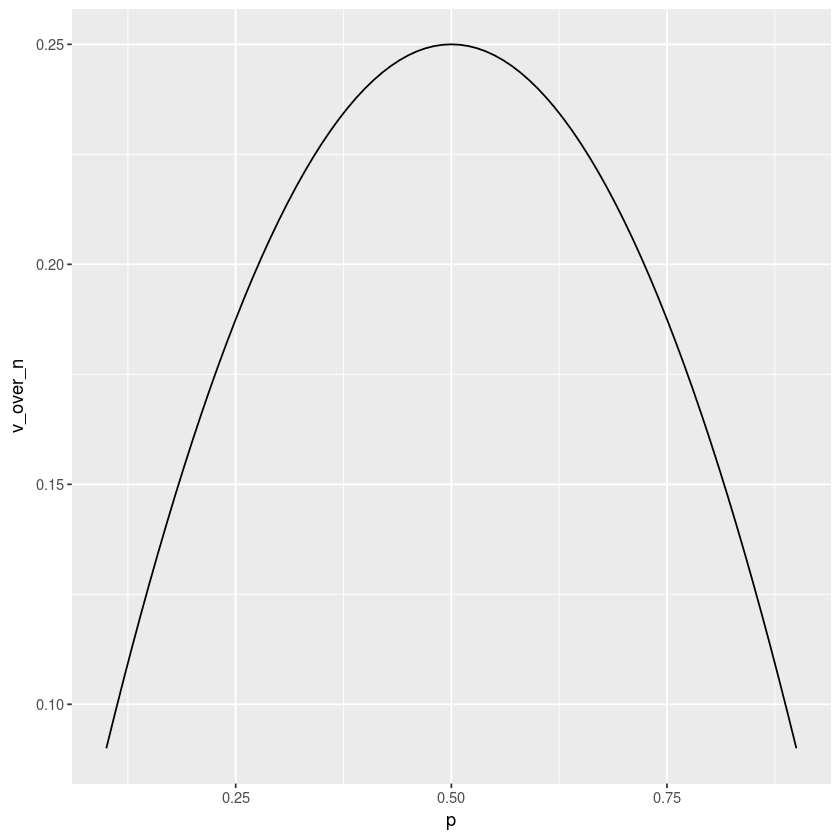

In [177]:
ggplot(x,aes(p,v_over_n)) +
geom_line()